# KMeans实现数据聚类

In [2]:

#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data1.csv')
data_result = pd.read_csv('task1_data2.csv')
data.head()
# data_result.head()

,x1,x2,y
0,82.5302,67.9939,0.0
1,14.3821,54.6641,NaN
2,88.9239,14.9664,NaN
3,78.0811,26.0769,NaN
4,78.1597,58.6068,NaN


In [3]:
data_result.head()


,x1,x2,y
0,82.5302,67.9939,0
1,14.3821,54.6641,1
2,88.9239,14.9664,0
3,78.0811,26.0769,0
4,78.1597,58.6068,0


In [4]:

#从data获取唯一一个有标签的数据点 命名为data_X_labeled
data_X_labeled = data.iloc[0,:]#索引为0的所有列
print(data_X_labeled)
print(type(data_X_labeled))

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


In [5]:

#data_X 赋值
data_X = data.drop(['y'],axis=1)
data_X.head()

,x1,x2
0,82.5302,67.9939
1,14.3821,54.6641
2,88.9239,14.9664
3,78.0811,26.0769
4,78.1597,58.6068


In [6]:
#data_result正确结果的赋值
y = data_result.loc[:,'y']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: y, dtype: int64

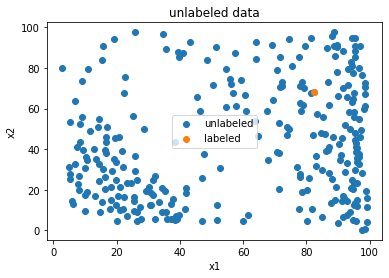

In [7]:

#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data_X.loc[:,'x1'],data_X.loc[:,'x2'],label='unlabeled')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

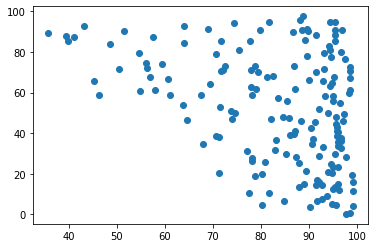

In [8]:
fig2 = plt.figure()

plt.scatter(data_X.loc[:,'x1'][y==0],data_X.loc[:,'x2'][y==0],label='label0')
#上面这行代码的逻辑是：选取列名为x1的列，前提是另一个数组y的bool判断返回值为1

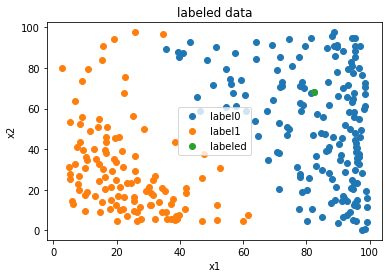

In [9]:
fig2 = plt.figure()
plt.scatter(data_X.loc[:,'x1'][y==0],data_X.loc[:,'x2'][y==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y==1],data_X.loc[:,'x2'][y==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()


In [10]:
#建立Kmeans模型并训练
from sklearn.cluster import KMeans
KM_model = KMeans(n_clusters=2,init='random',random_state=0)
KM_model.fit(data_X)

KMeans(init='random', n_clusters=2, random_state=0)

In [11]:
#查看聚类中心
centres_2 = KM_model.cluster_centers_
print(centres_2)

[[82.88964583 52.50966869]
 [23.23572487 28.61664752]]


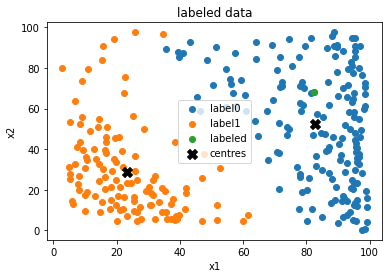

In [12]:
fig3 = plt.figure()
plt.scatter(data_X.loc[:,'x1'][y==0],data_X.loc[:,'x2'][y==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y==1],data_X.loc[:,'x2'][y==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.scatter(centres_2[:,0],centres_2[:,1],100,marker='X',c='k'
'',label = 'centres')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

In [13]:
#无监督聚类结果预测
y_predict = KM_model.predict(data_X)
print(y_predict)
print(pd.value_counts(y_predict))
print(pd.value_counts(y))

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    168
1    117
dtype: int64
0    167
1    118
Name: y, dtype: int64


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)

print('accuracy = ', '%.3f' % accuracy)

accuracy =  0.996


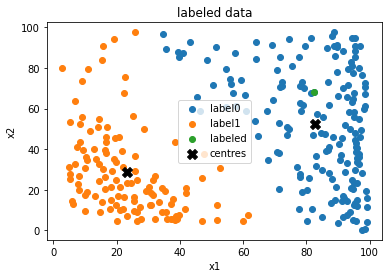

In [15]:

fig4 = plt.figure()
plt.scatter(data_X.loc[:,'x1'][y_predict==0],data_X.loc[:,'x2'][y_predict==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y_predict==1],data_X.loc[:,'x2'][y_predict==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.scatter(centres_2[:,0],centres_2[:,1],100,marker='X',c='k'
'',label = 'centres')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

In [16]:
y_opp = pd.DataFrame(y_predict)
y_opp = y_opp.replace({0:1, 1:0})

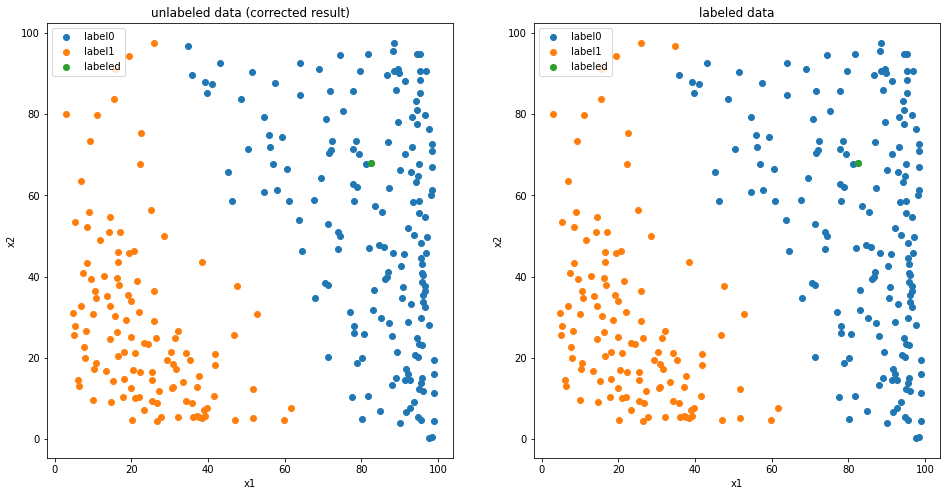

        accuracy =  0.996


In [17]:
fig8 = plt.figure(figsize=(16,8))

fig9=plt.subplot(121)
plt.scatter(data_X.loc[:,'x1'][y_predict==0],data_X.loc[:,'x2'][y_predict==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y_predict==1],data_X.loc[:,'x2'][y_predict==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.title('unlabeled data (corrected result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig10=plt.subplot(122)
plt.scatter(data_X.loc[:,'x1'][y==0],data_X.loc[:,'x2'][y==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y==1],data_X.loc[:,'x2'][y==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()
print('        accuracy = ', '%.3f' % accuracy)

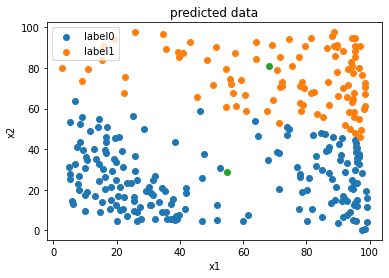

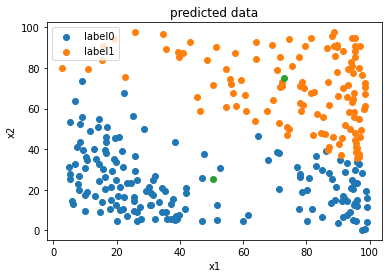

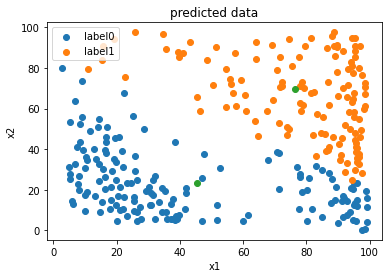

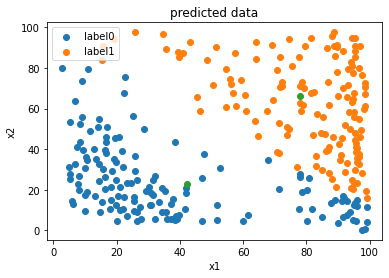

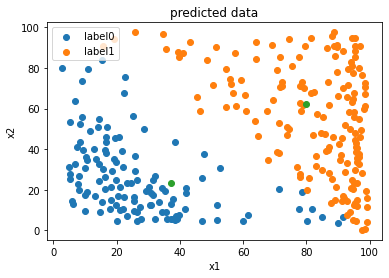

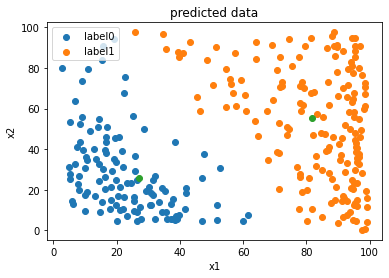

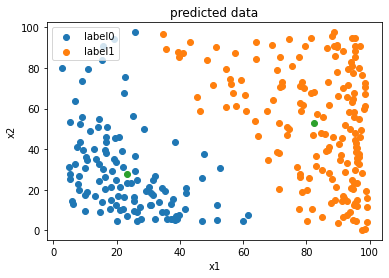

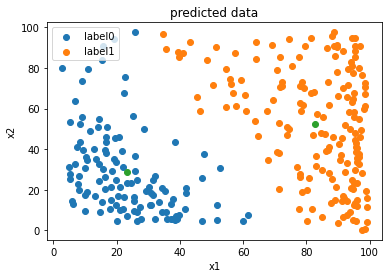

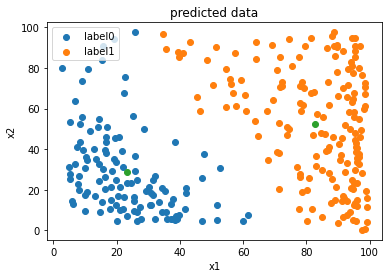

In [28]:


#逐步迭代查看KMeans模型训练效果
centers = np.array([[0,0,0,0]])
for i in range(1,10):
    KM = KMeans(n_clusters=2,random_state=1,init='random',n_init=1,max_iter=i)
    KM.fit(data_X)

    centers_i = KM.cluster_centers_
    centers_i_temp = centers_i.reshape(1,-1)
    centers = np.concatenate((centers,centers_i_temp),axis=0)
    #predict based on training data
    y_predict = KM.predict(data_X)

    #visualize the data and results
    fig_i = plt.figure()
    label0 = plt.scatter(data_X.loc[:,'x1'][y_predict==0],data_X.loc[:,
                                                     'x2'][y_predict==0])
    label1 = plt.scatter(data_X.loc[:,'x1'][y_predict==1],data_X.loc[:,'x2'][y_predict==1])

    plt.title("predicted data")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend((label0,label1),('label0','label1'), loc='upper left')
    plt.scatter(centers_i[:,0],centers_i[:,1])
    fig_i.savefig('2d_output/{}.png'.format(i),dpi=500,bbox_inches = 'tight')

In [20]:

#生成gif动图
import PIL.Image as Image

In [29]:
def get_gif(pic_dir,n,t=1):
    imgs = []
    for i in range(1,n):
        pic_name = '{}/{}.png'.format(pic_dir,i)
        temp = Image.open(pic_name)
        imgs.append(temp)
    save_name = '{}.gif'.format(pic_dir)
    imgs[0].save(save_name, save_all=True, append_images=imgs, duration=3)
    return save_name


pic_dir = '2d_output'
save_name = get_gif(pic_dir,10,0.2)
print('制作完成。文件为:{}'.format(save_name))

制作完成。文件为:2d_output.gif


In [18]:
#KNN 模型
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(data_X,y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#knn预测
y_predict_knn = KNN.predict(data_X)
accuracy_knn = accuracy_score(y,y_predict_knn)
print(accuracy_knn)

1.0


In [21]:

#统计类别分布
print(pd.value_counts(y_predict_knn))
print(pd.value_counts(y))

0    167
1    118
dtype: int64
0    167
1    118
Name: y, dtype: int64


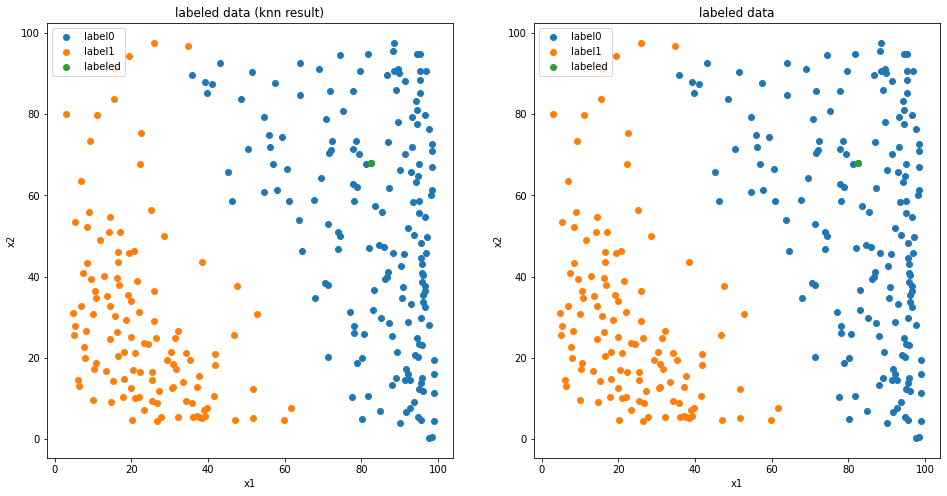

        accuracy =  1.000


In [24]:

fig11 = plt.figure(figsize=(16,8))

fig12=plt.subplot(121)
plt.scatter(data_X.loc[:,'x1'][y_predict_knn==0],data_X.loc[:,'x2'][y_predict_knn==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y_predict_knn==1],data_X.loc[:,'x2'][y_predict_knn==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.title('labeled data (knn result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig13=plt.subplot(122)
plt.scatter(data_X.loc[:,'x1'][y==0],data_X.loc[:,'x2'][y==0],label='label0')
plt.scatter(data_X.loc[:,'x1'][y==1],data_X.loc[:,'x2'][y==1],label='label1')
plt.scatter(data_X_labeled['x1'],data_X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()
print('        accuracy = ', '%.3f' % accuracy_knn)